# Pyroomasync usage examples

## Basic imports

In [1]:
# Make python find the "pyroomasync" directory
import sys
sys.path.append("../")

from IPython.display import display, Audio

from pyroomasync.utils.visualization import (
    plot_microphone_signals,
    plot_room
)

def show_results(room, simulation_results):
    
    plot_room_2d(room)
    plot_microphone_signals(simulation_results)

    display(Audio(simulation_results[0], rate=room.base_fs))
    display(Audio(simulation_results[1], rate=room.base_fs))

# Example 1: Simulating using the object-oriented approach

In [2]:
from pyroomasync import (
    ConnectedShoeBox,
    simulate
)

# Create room
room = ConnectedShoeBox([4.47, 5.13, 3.18])

# Add microphones with their sampling frequencies and latencies
room.add_microphone([3.40, 2.10, 0.72], fs=32000, delay=0.2, id="chromebook1")
room.add_microphone([3.35, 3.41, 0.72], fs=31999, delay=0.02, id="chromebook2")

# Add a source
room.add_source([1.98, 0.61, 0], "data/vctk/p225_002.wav", id="fostex")

# Add point to point room impulse responses (one for each source-microphone pair)
room.add_rir("data/ace/Chromebook_EE_lobby_1_RIR.wav", "chromebook1", "fostex")
room.add_rir("data/ace/Chromebook_EE_lobby_2_RIR.wav", "chromebook2", "fostex")

# simulate and get the results recorded in the microphones
simulation_results = simulate(room)

show_results(room, simulation_results)

TypeError: add_microphone() got an unexpected keyword argument 'fs'

## Example 2: Simulating using the .json configuration

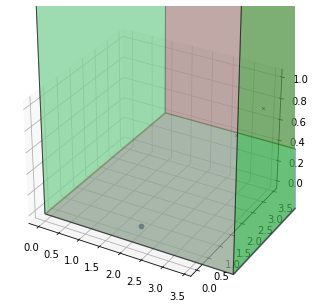

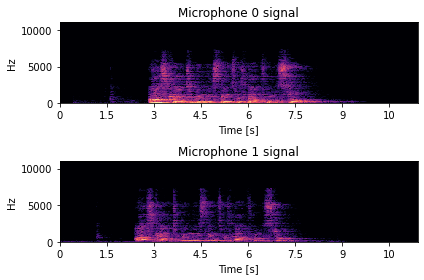

In [3]:
from pyroomasync import (
    from_experiment_config_json,
    simulate
)

config_json = {
    "room":{
        "dims":[4.47, 5.13, 3.18],
        "rirs":[
            {
                "source_id": "fostex",
                "microphone_id": "chromebook1",
                "signal_file_path": "data/ace/Chromebook_EE_lobby_1_RIR.wav"
            },
            {
                "source_id": "fostex",
                "microphone_id": "chromebook2",
                "signal_file_path": "data/ace/Chromebook_EE_lobby_2_RIR.wav"
            }
        ]
    },
    "sources":[
        {
            "id": "fostex",
            "signal_file_path": "data/vctk/p225_002.wav",
            "location": [1.98, 0.61, 0]
        }
    ],
    "microphones":[
        {
            "id": "chromebook1",
            "location": [3.40, 2.10, 0.72],
            "sr": 32000,
            "delay": 0.2
        },
        {
            "id": "chromebook2",
            "location": [3.35, 3.41, 0.72],
            "sr": 31999,
            "delay": 0
        }
    ]
}

room = from_experiment_config_json(config_json)
simulation_results = simulate(room)

show_results(room, simulation_results)

# Same results, different input.